In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

[Univariate Time Series Anomaly Detection Using ARIMA Model](https://www.analyticsvidhya.com/blog/2021/08/univariate-time-series-anomaly-detection-using-arima-model/)

In [6]:
df=pd.read_csv('training_100.csv')
df['timestamp']=pd.to_datetime(df['timestamp'])
df.tail()

timestamp  kpi_value  request_count  anomaly_label
20154 2020-08-28 01:56:00+02:00   0.998149          26467              0
20155 2020-08-28 01:57:00+02:00   0.998340          26502              0
20156 2020-08-28 01:58:00+02:00   0.998364          26887              0
20157 2020-08-28 01:59:00+02:00   0.998428          26712              0
20158 2020-08-28 02:00:00+02:00   0.997407          29694              0

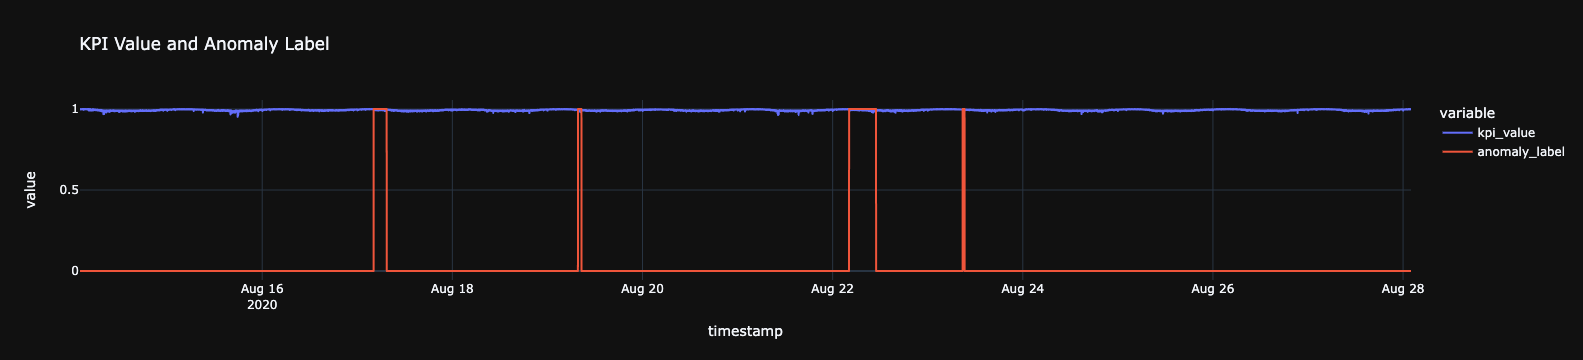

In [7]:
import plotly.express as px
fig = px.line(df, x="timestamp", y=['kpi_value', 'anomaly_label'], title='KPI Value and Anomaly Label', template='plotly_dark')
fig.show()

[Python | ARIMA Model for Time Series Forecasting](https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/)

In [8]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df['kpi_value'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=-201225.119, Time=38.01 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-188722.933, Time=2.70 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-197173.100, Time=13.04 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-198379.690, Time=19.80 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-188724.929, Time=1.58 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=-193421.830, Time=11.03 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=-200679.675, Time=41.93 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=-201813.280, Time=73.45 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=-201824.411, Time=49.01 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=-201687.738, Time=88.70 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=-200732.835, Time=64.37 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=-198313.088, Time=30.53 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=-200439.308, Time=104.81 sec
 ARIMA(2,0,1)(1,1,2)[12] intercept 

In [ ]:
stepwise_fit.summary()

In [ ]:
# Split data into train / test sets
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:] # set one year(12 months) for testing

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(train['kpi_value'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 12))

In [ ]:
result = model.fit()
result.summary()

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['kpi_value'].plot(legend = True)

In [ ]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse=rmse(test["kpi_value"], predictions)

# Calculate mean squared error
mse=mean_squared_error(test["kpi_value"], predictions)

print(f"Root Mean Squared Error: {round(rmse, 5)}")
print(f"Mean Squared Error: {round(mse, 5)}")

In [ ]:
# Train the model on the full dataset
model = model = SARIMAX(df['kpi_value'], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(df), 
                          end = (len(df)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
df['kpi_value'].plot(figsize = (24, 5), legend = True)
forecast.plot(legend = True)

In [ ]:
# Instructions instead of predicting the testing dataset, predict the complete signal

In [ ]:
# Train the model on the full dataset
model2 = model = SARIMAX(df['kpi_value'], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
result2 = model2.fit()
  
# Forecast for the next 3 years
forecast2 = result2.predict(start = 0, 
                          end = (len(df)-1), 
                          typ = 'levels').rename('Forecast2')

In [ ]:
difference=abs(df['kpi_value']-forecast2)
# Plot the forecast values
df['kpi_value'].plot(figsize = (24, 5), legend = True)
forecast2.plot(legend = True)
plt.plot(difference, 'g--', label='difference')
#plt.savefigure("Forcast for all the data.png")

In [ ]:
print(difference.max())
print(difference.min())
threshold=difference.max()*0.6
print(threshold)

In [ ]:
plt.figure(figsize=(40,10))
plt.plot(df['kpi_value'], label='KPI Value', linewidth='1.5', color='blue')
plt.plot(forecast2, label='Forecast', linewidth='1.5', color='red')
plt.plot(difference, 'g--',  label='Absoulute Difference', linewidth='1', color='black')
plt.axhline(threshold, label='Threshold Using Max 60%', linewidth='2', color='green')
plt.legend(loc='upper left')

plt.title("Forcast for all the data", fontsize=45)
plt.xlabel("TimeStamps every five minutes", fontsize=30)

plt.minorticks_on()
plt.grid()

#plt.savefig("Forcast for all the data.png")

In [ ]:
difference[3500]

In [ ]:
anomaly=[]
for i in range(len(df)):
    anomaly.append(i)
    

In [ ]:
anomaly[89]

In [ ]:
anomaly=[]
for i in range(len(df)):
    if difference[i] > threshold:
        anomaly.append(1)
    elif difference[i] <= threshold:
        anomaly.append(0)

In [ ]:
label=df['anomaly_label']

In [ ]:
anomaly=np.array(anomaly)
plt.figure(figsize=(40,10))
plt.plot(anomaly, label='Predicted Anomalies', linewidth='1.5', color='red')
plt.plot(label, label='Labeled Anomalies', linewidth='1.5', color='blue')
plt.legend(loc='upper left')

plt.minorticks_on()
plt.grid()

In [ ]:
new_anomaly=[]
for i in range(len(df)):
    if anomaly[i] == 1 and label[i] == 1:
        new_anomaly.append(1)
    else:
        new_anomaly.append(0)
        
plt.figure(figsize=(40,10))
plt.plot(new_anomaly, label='New Predicted Anomalies', linewidth='1.5', color='green')
plt.plot(label, label='Labeled Anomalies', linewidth='1.5', color='blue')
plt.legend(loc='upper left')

plt.minorticks_on()
plt.grid()

plt.savefig('Anomalies prediction from Training Set 6 using ARIMA.png')

In [ ]:
tp=0
fp=0
tn=0
fn=0
for i in range(len(df)):
    if anomaly[i] == 1 and label[i] == 1:
        tp=tp+1
    elif anomaly[i] == 1 and label[i] != 1:
        fp=fp+1
    elif anomaly[i] != 1 and label[i] == 1:
        fn=fn+1
    elif anomaly[i] != 1 and label[i] != 1:
        tn=tn+1
            
print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}")
print(f"######################")
precision=tp/(tp+fp)
print(f"Precision: {round(precision,3)}")
recall=tp/(tp+fn)
print(f"Recall: {round(recall,3)}")

F1_Score=(2*precision*recall)/(precision+recall)
print(f"F1 Score: {round(F1_Score,3)}")